In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
stores = pd.read_csv("/content/stores.csv")
transactions = pd.read_csv("/content/transactions.csv")
oil = pd.read_csv("/content/oil.csv")
holidays = pd.read_csv("/content/holidays_events.csv")

In [7]:
print(train.shape)

(3000888, 6)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/test.csv")
oil = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/oil.csv")
stores = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/stores.csv")
sample_submission = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/sample_submission.csv")
holiday_events = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/holidays_events.csv")
transactions = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/transactions.csv")


In [31]:
print(test.isnull().sum())

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [16]:
print(train.columns.tolist())

['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']


In [128]:
display(train.nunique())

,0
id,3000888
date,1684
store_nbr,54
family,33
sales,379610
onpromotion,362


In [17]:
print(train.describe(include='all'))

                  id        date     store_nbr      family         sales  \
count   3.000888e+06     3000888  3.000888e+06     3000888  3.000888e+06   
unique           NaN        1684           NaN          33           NaN   
top              NaN  2017-08-15           NaN  AUTOMOTIVE           NaN   
freq             NaN        1782           NaN       90936           NaN   
mean    1.500444e+06         NaN  2.750000e+01         NaN  3.577757e+02   
std     8.662819e+05         NaN  1.558579e+01         NaN  1.101998e+03   
min     0.000000e+00         NaN  1.000000e+00         NaN  0.000000e+00   
25%     7.502218e+05         NaN  1.400000e+01         NaN  0.000000e+00   
50%     1.500444e+06         NaN  2.750000e+01         NaN  1.100000e+01   
75%     2.250665e+06         NaN  4.100000e+01         NaN  1.958473e+02   
max     3.000887e+06         NaN  5.400000e+01         NaN  1.247170e+05   

         onpromotion  
count   3.000888e+06  
unique           NaN  
top              N

In [18]:
train['date'] = pd.to_datetime(train['date'])

In [28]:
print(train.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object


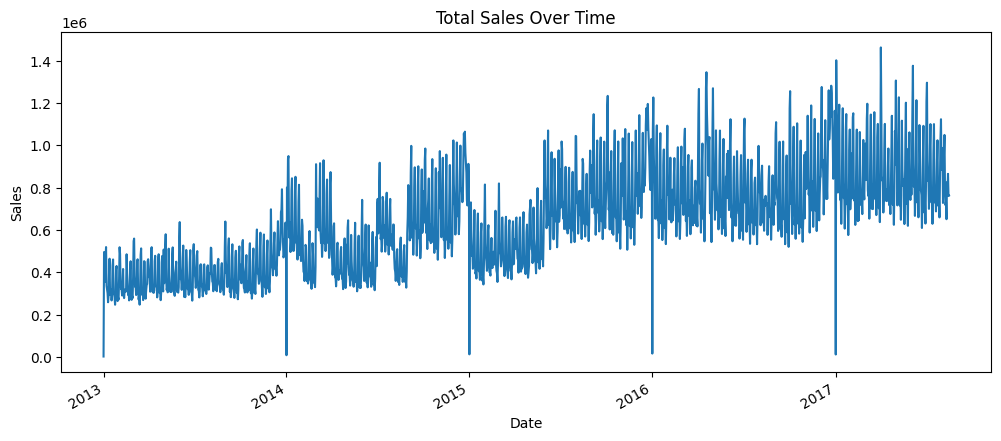

In [125]:
# Sales Over Time
plt.figure(figsize=(12, 5))
train.groupby("date")["sales"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

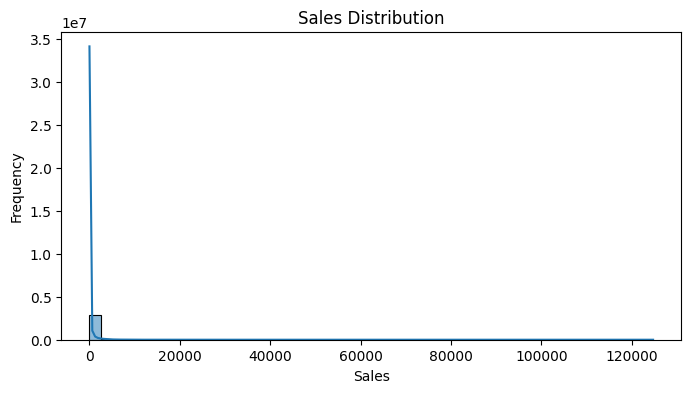

In [124]:
# Sales Distribution
plt.figure(figsize=(8, 4))
sns.histplot(train['sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

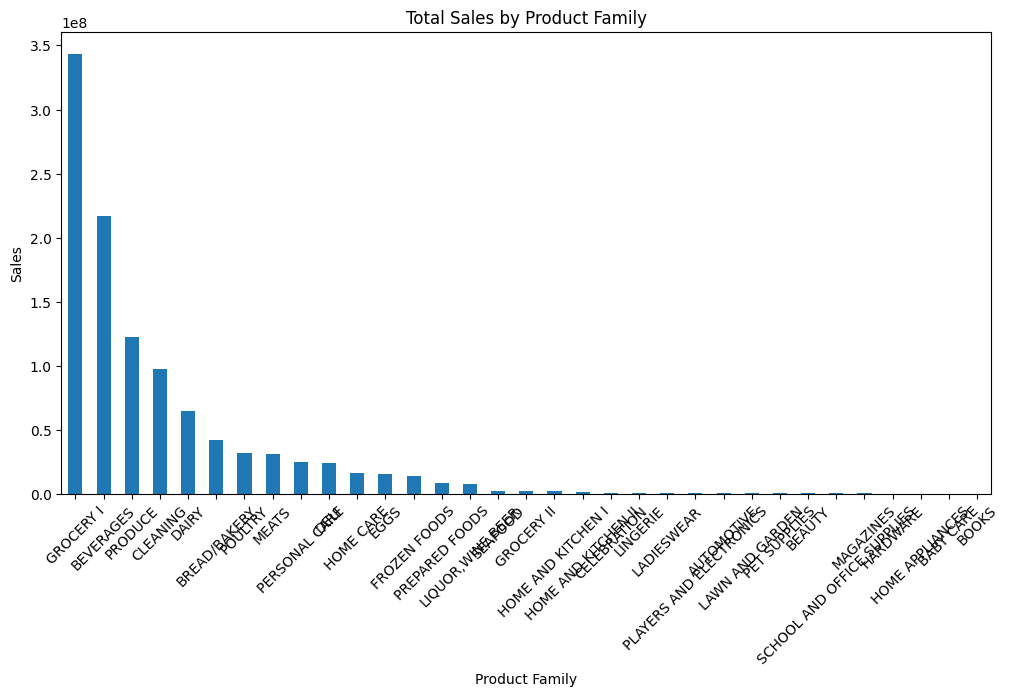

In [123]:
# Sales by Product Family
if 'family' in train.columns:
    plt.figure(figsize=(12, 6))
    train.groupby('family')['sales'].sum().sort_values(ascending=False).plot(kind='bar')
    plt.title("Total Sales by Product Family")
    plt.xlabel("Product Family")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.show()

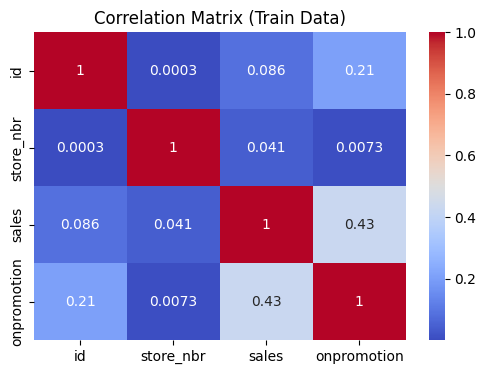

In [27]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Train Data)")
plt.show()

In [11]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [12]:
print(test.shape)

(28512, 5)


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [29]:
print(test.columns.tolist())

['id', 'date', 'store_nbr', 'family', 'onpromotion']


In [32]:
print(test.describe(include='all'))

                  id        date     store_nbr      family   onpromotion
count   2.851200e+04       28512  28512.000000       28512  28512.000000
unique           NaN          16           NaN          33           NaN
top              NaN  2017-08-16           NaN  AUTOMOTIVE           NaN
freq             NaN        1782           NaN         864           NaN
mean    3.015144e+06         NaN     27.500000         NaN      6.965383
std     8.230850e+03         NaN     15.586057         NaN     20.683952
min     3.000888e+06         NaN      1.000000         NaN      0.000000
25%     3.008016e+06         NaN     14.000000         NaN      0.000000
50%     3.015144e+06         NaN     27.500000         NaN      0.000000
75%     3.022271e+06         NaN     41.000000         NaN      6.000000
max     3.029399e+06         NaN     54.000000         NaN    646.000000


In [34]:
print(test.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
onpromotion             int64
dtype: object


In [40]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [41]:
print(transactions.shape)

(83488, 3)


In [42]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None


In [43]:
print(transactions.isnull().sum())

date            0
store_nbr       0
transactions    0
dtype: int64


In [44]:
print(transactions.describe())

          store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.000000   1393.000000
75%       40.000000   2079.000000
max       54.000000   8359.000000


In [45]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [46]:
print(transactions.dtypes)

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object


/tmp/ipython-input-7064490.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


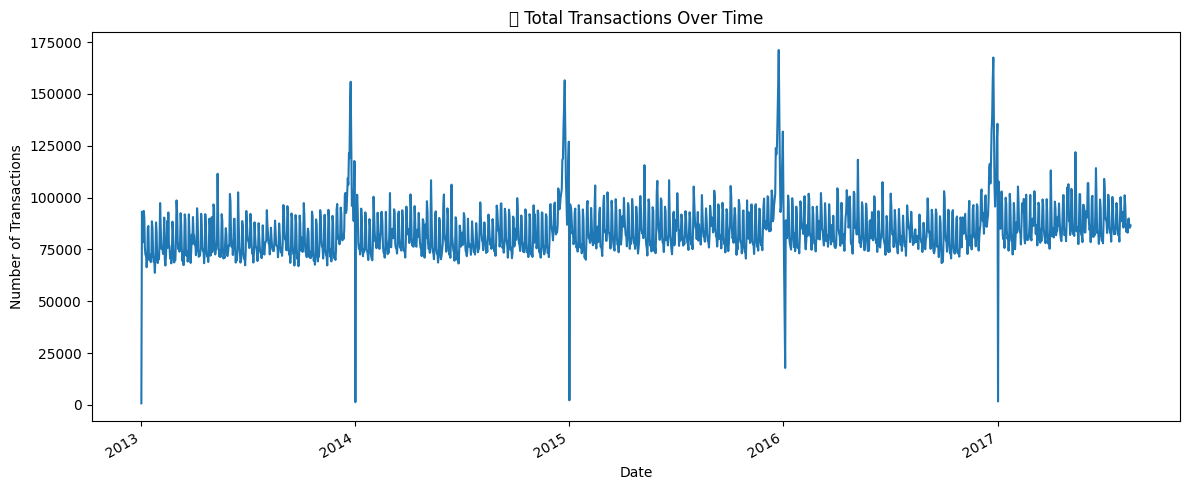

In [48]:
# Transactions Over Time for All Stores
plt.figure(figsize=(12, 5))
transactions.groupby("date")["transactions"].sum().plot()
plt.title("📈 Total Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1514087363.py:7: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


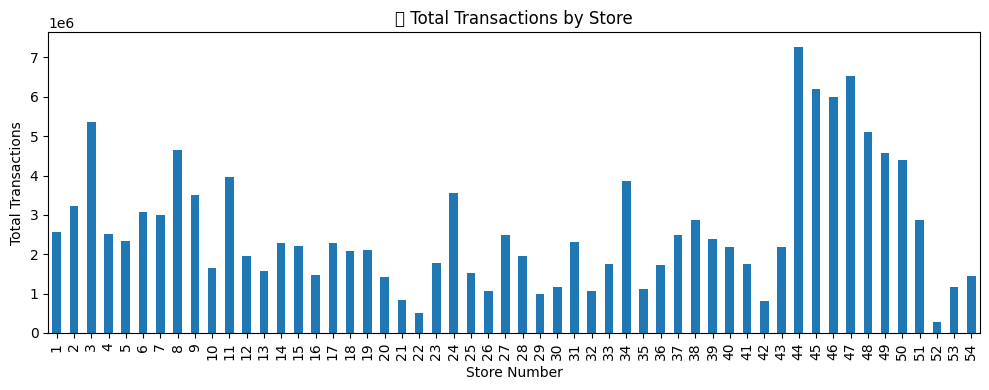

In [49]:
# Transactions Per Store
plt.figure(figsize=(10, 4))
transactions.groupby("store_nbr")["transactions"].sum().plot(kind='bar')
plt.title("🏪 Total Transactions by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Transactions")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2570628888.py:7: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


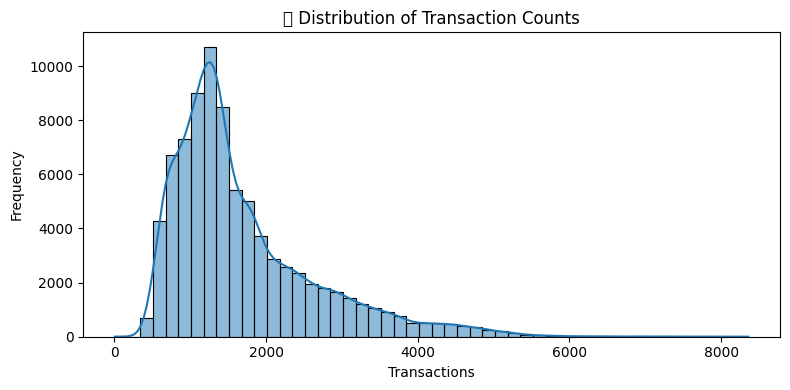

In [50]:
#Distribution of Transactions
plt.figure(figsize=(8, 4))
sns.histplot(transactions['transactions'], bins=50, kde=True)
plt.title("🪙 Distribution of Transaction Counts")
plt.xlabel("Transactions")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

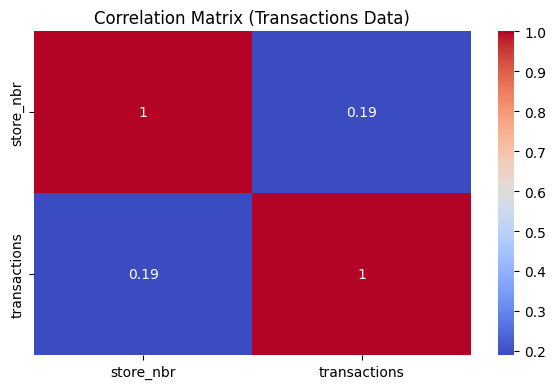

In [55]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(transactions.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Transactions Data)")
plt.tight_layout()
plt.show()

In [79]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [57]:
print(stores.shape)


(54, 5)


In [58]:
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None


In [59]:
print(stores.columns.tolist())

['store_nbr', 'city', 'state', 'type', 'cluster']


In [60]:
print(stores.isnull().sum())

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [61]:
print(stores.describe(include='all'))

        store_nbr   city      state type    cluster
count   54.000000     54         54   54  54.000000
unique        NaN     22         16    5        NaN
top           NaN  Quito  Pichincha    D        NaN
freq          NaN     18         19   18        NaN
mean    27.500000    NaN        NaN  NaN   8.481481
std     15.732133    NaN        NaN  NaN   4.693395
min      1.000000    NaN        NaN  NaN   1.000000
25%     14.250000    NaN        NaN  NaN   4.000000
50%     27.500000    NaN        NaN  NaN   8.500000
75%     40.750000    NaN        NaN  NaN  13.000000
max     54.000000    NaN        NaN  NaN  17.000000


In [62]:
print(stores.dtypes)

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object


In [64]:
# Unique Values per Column
print("\n UNIQUE VALUE COUNTS:")
for col in stores.columns:
    print(f"{col}: {stores[col].nunique()}")


 UNIQUE VALUE COUNTS:
store_nbr: 54
city: 22
state: 16
type: 5
cluster: 17


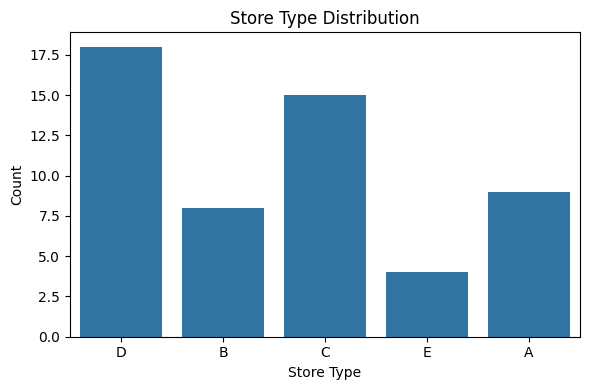

In [76]:
# Store Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=stores, x='type')
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

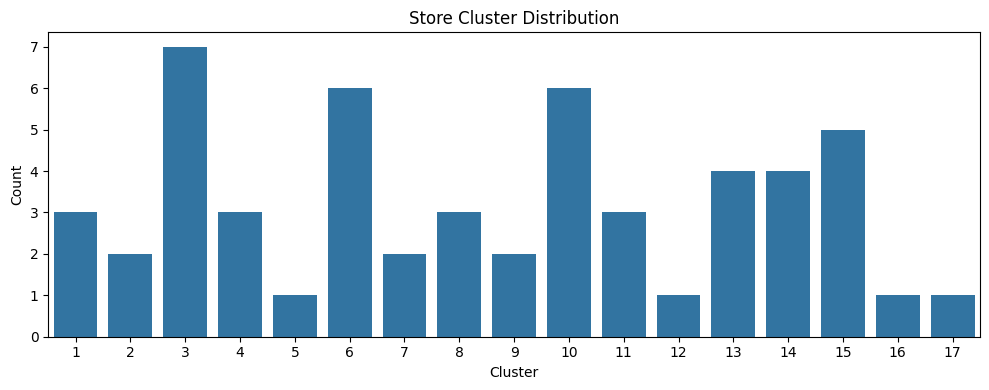

In [75]:
# Store Cluster Distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=stores, x='cluster')
plt.title("Store Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

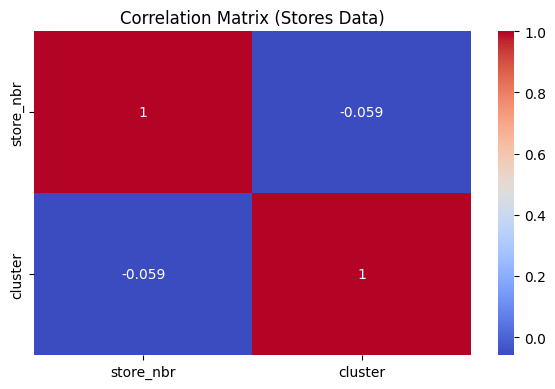

In [77]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(stores.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Stores Data)")
plt.tight_layout()
plt.show()

In [80]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [82]:
print(oil.shape)

(1218, 2)


In [83]:
print(oil.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None


In [84]:
print(oil.columns.tolist())

['date', 'dcoilwtico']


In [85]:
print(oil.isnull().sum())

date           0
dcoilwtico    43
dtype: int64


In [87]:
oil['date'] = pd.to_datetime(oil['date'])

In [88]:
print(oil.dtypes)

date          datetime64[ns]
dcoilwtico           float64
dtype: object


In [86]:
print(oil.describe())

        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000


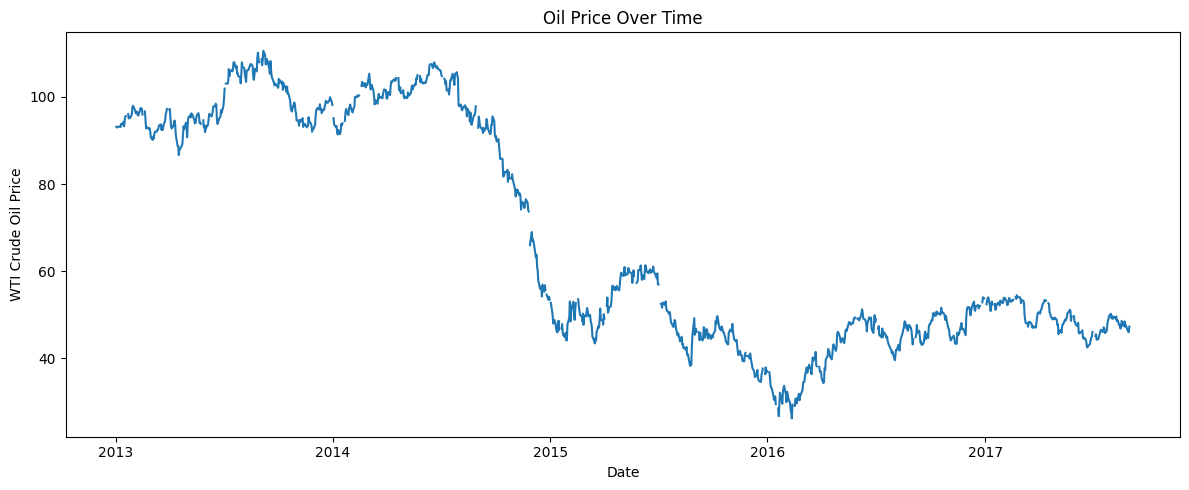

In [91]:
# Oil Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("WTI Crude Oil Price")
plt.tight_layout()
plt.show()


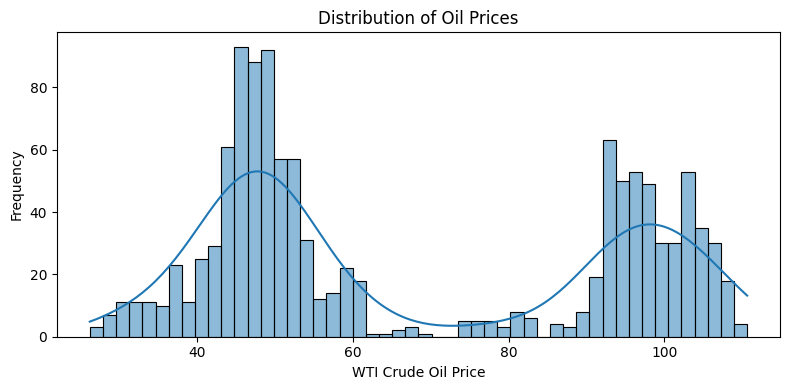

In [97]:
# Distribution of Oil Prices
plt.figure(figsize=(8, 4))
sns.histplot(oil['dcoilwtico'].dropna(), bins=50, kde=True)
plt.title("Distribution of Oil Prices")
plt.xlabel("WTI Crude Oil Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [100]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [101]:
print(holidays.shape)

(350, 6)


In [103]:
print(holidays.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None


In [104]:
print(holidays.columns.tolist())

['date', 'type', 'locale', 'locale_name', 'description', 'transferred']


In [105]:
print(holidays.isnull().sum())

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [106]:
holidays['date'] = pd.to_datetime(holidays['date'])

In [107]:
print(holidays.dtypes)

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object


In [108]:
print(holidays.describe(include='all'))

                                 date     type    locale locale_name  \
count                             350      350       350         350   
unique                            NaN        6         3          24   
top                               NaN  Holiday  National     Ecuador   
freq                              NaN      221       174         174   
mean    2015-04-24 00:45:15.428571392      NaN       NaN         NaN   
min               2012-03-02 00:00:00      NaN       NaN         NaN   
25%               2013-12-23 06:00:00      NaN       NaN         NaN   
50%               2015-06-08 00:00:00      NaN       NaN         NaN   
75%               2016-07-03 00:00:00      NaN       NaN         NaN   
max               2017-12-26 00:00:00      NaN       NaN         NaN   

       description transferred  
count          350         350  
unique         103           2  
top       Carnaval       False  
freq            10         338  
mean           NaN         NaN  
min      

In [126]:
# Unique values per column
print("\nUnique Value Counts:")
for col in holidays.columns:
    print(f"{col}: {holidays[col].nunique()}")


Unique Value Counts:
date: 312
type: 6
locale: 3
locale_name: 24
description: 103
transferred: 2


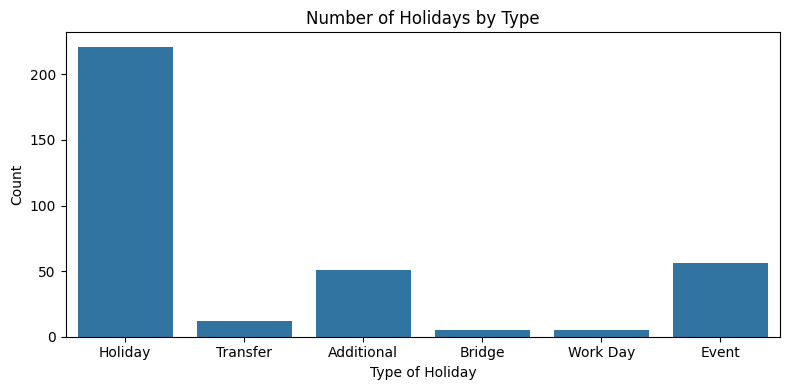

In [110]:
# Holiday Types Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays, x='type')
plt.title("Number of Holidays by Type")
plt.xlabel("Type of Holiday")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

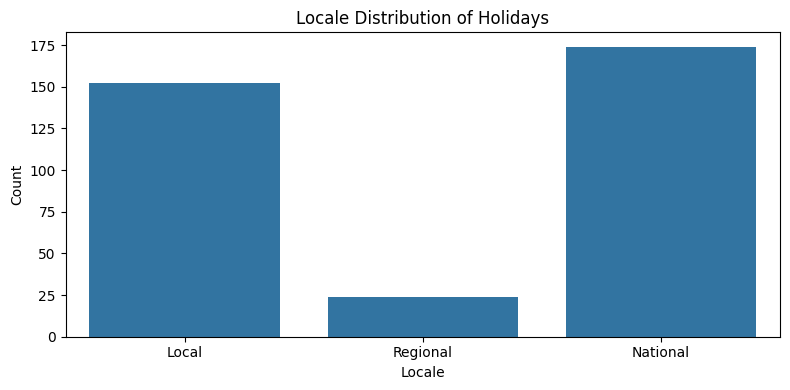

In [112]:
# Holiday Locale Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays, x='locale')
plt.title("Locale Distribution of Holidays")
plt.xlabel("Locale")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [119]:
holidays['locale_name'].value_counts().head(10)

,count
locale_name,
Ecuador,174
Quito,13
Guaranda,12
Riobamba,12
Latacunga,12
Ambato,12
Guayaquil,11
Cuenca,7
Ibarra,7


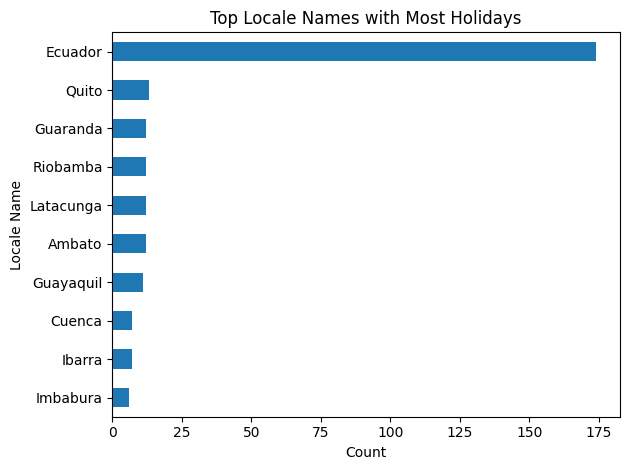

In [121]:
top_locale_names = holidays['locale_name'].value_counts().head(10)
top_locale_names.plot(kind='barh')
plt.title("Top Locale Names with Most Holidays")
plt.xlabel("Count")
plt.ylabel("Locale Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

/tmp/ipython-input-444714946.py:7: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


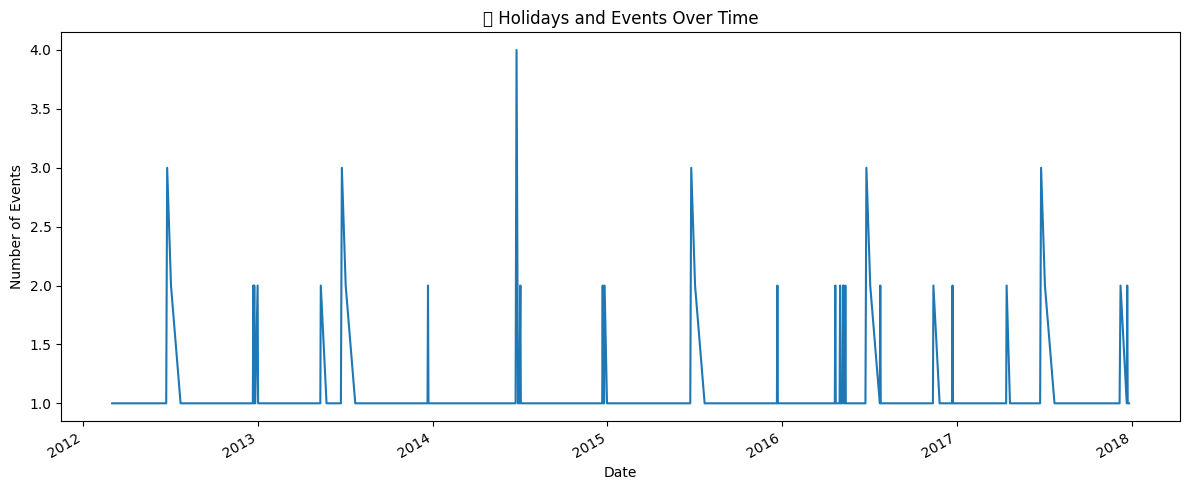

In [116]:
# Holidays Over Time
plt.figure(figsize=(12, 5))
holidays['date'].value_counts().sort_index().plot()
plt.title("🗓️ Holidays and Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()

In [127]:
print("Transferred column value counts:")
print(holidays['transferred'].value_counts())

Transferred column value counts:
transferred
False    338
True      12
Name: count, dtype: int64


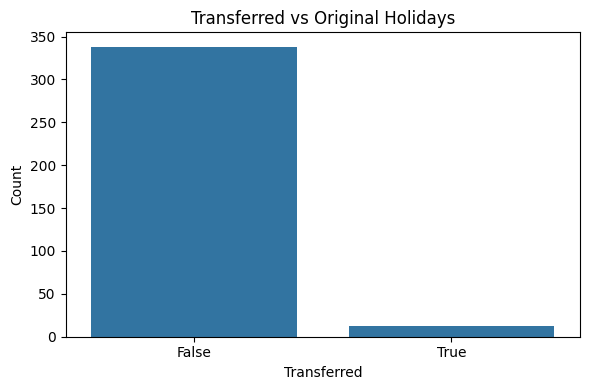

In [118]:
# Transferred Holidays
plt.figure(figsize=(6, 4))
sns.countplot(data=holidays, x='transferred')
plt.title("Transferred vs Original Holidays")
plt.xlabel("Transferred")
plt.ylabel("Count")
plt.tight_layout()
plt.show()